In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [369]:
# data = pd.read_csv("C:/연구인턴십/final_data.csv")

data = pd.read_csv("C:/연구인턴십/real_data7.csv")

In [370]:
data.head()

,GENDER,AGE_GRP,INCOME,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,MVMN,WEEKEND_INCLUDED,SEASON,TOTAL_COST,TRAVEL_COMPANIONS_NUM,TRAVEL_DAY,TOTAL_AMT,TOTAL_LODGE,TOTAL_MVMN,lat_start,lon_start,lat_dest,lon_dest
0,남,20,1,강원,강원,대중교통 등,1,가을,169590.0,1.0,3.0,93300.0,72990.0,3300.0,37.885326,127.729829,37.885326,127.729829
1,남,20,1,강원,경기,대중교통 등,1,여름,379750.0,3.0,3.0,207900.0,170000.0,1850.0,37.885326,127.729829,37.274977,127.008930
2,남,20,1,강원,서울,대중교통 등,0,가을,51950.0,0.0,2.0,37000.0,0.0,14950.0,37.885326,127.729829,37.566826,126.978652
3,남,20,1,강원,서울,대중교통 등,0,여름,130020.0,0.0,3.0,74800.0,0.0,55220.0,37.885326,127.729829,37.566826,126.978652
4,남,20,1,경기,강원,렌탈,0,여름,725350.0,1.0,4.0,189050.0,134900.0,401400.0,37.274977,127.008930,37.885326,127.729829


In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     6146 non-null   object 
 1   AGE_GRP                    6146 non-null   int64  
 2   INCOME                     6146 non-null   int64  
 3   TRAVEL_STATUS_RESIDENCE    6146 non-null   object 
 4   TRAVEL_STATUS_DESTINATION  6146 non-null   object 
 5   MVMN                       6146 non-null   object 
 6   WEEKEND_INCLUDED           6146 non-null   int64  
 7   SEASON                     6146 non-null   object 
 8   TOTAL_COST                 6146 non-null   float64
 9   TRAVEL_COMPANIONS_NUM      6146 non-null   float64
 10  TRAVEL_DAY                 6146 non-null   float64
 11  TOTAL_AMT                  6146 non-null   float64
 12  TOTAL_LODGE                6146 non-null   float64
 13  TOTAL_MVMN                 6146 non-null   float

In [372]:
# lat_dest 열의 결측치를 가진 행의 도착 지역명 확인
missing_lat_dest_locations = data[data['lat_dest'].isna()]['TRAVEL_STATUS_DESTINATION'].unique()

print("lat_dest의 결측치를 가진 도착 지역명:")
print(missing_lat_dest_locations)

lat_dest의 결측치를 가진 도착 지역명:
['도서 지역']


In [373]:
# 도서 지역의 대표 좌표 설정 (예: 울릉도 사용)
island_coordinates = {"latitude": 37.4842, "longitude": 130.9057}

# lat_dest와 lon_dest 결측치에 대표 좌표 할당
data.loc[data['TRAVEL_STATUS_DESTINATION'] == '도서 지역', 'lat_dest'] = island_coordinates['latitude']
data.loc[data['TRAVEL_STATUS_DESTINATION'] == '도서 지역', 'lon_dest'] = island_coordinates['longitude']

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     6146 non-null   object 
 1   AGE_GRP                    6146 non-null   int64  
 2   INCOME                     6146 non-null   int64  
 3   TRAVEL_STATUS_RESIDENCE    6146 non-null   object 
 4   TRAVEL_STATUS_DESTINATION  6146 non-null   object 
 5   MVMN                       6146 non-null   object 
 6   WEEKEND_INCLUDED           6146 non-null   int64  
 7   SEASON                     6146 non-null   object 
 8   TOTAL_COST                 6146 non-null   float64
 9   TRAVEL_COMPANIONS_NUM      6146 non-null   float64
 10  TRAVEL_DAY                 6146 non-null   float64
 11  TOTAL_AMT                  6146 non-null   float64
 12  TOTAL_LODGE                6146 non-null   float64
 13  TOTAL_MVMN                 6146 non-null   float

In [375]:
# AGE_GRP, INCOME, WEEKEND_INCLUDED 변수를 범주형으로 변환
data['AGE_GRP'] = data['AGE_GRP'].astype('category')
data['INCOME'] = data['INCOME'].astype('category')
data['WEEKEND_INCLUDED'] = data['WEEKEND_INCLUDED'].astype('category')

# 변경 결과 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   GENDER                     6146 non-null   object  
 1   AGE_GRP                    6146 non-null   category
 2   INCOME                     6146 non-null   category
 3   TRAVEL_STATUS_RESIDENCE    6146 non-null   object  
 4   TRAVEL_STATUS_DESTINATION  6146 non-null   object  
 5   MVMN                       6146 non-null   object  
 6   WEEKEND_INCLUDED           6146 non-null   category
 7   SEASON                     6146 non-null   object  
 8   TOTAL_COST                 6146 non-null   float64 
 9   TRAVEL_COMPANIONS_NUM      6146 non-null   float64 
 10  TRAVEL_DAY                 6146 non-null   float64 
 11  TOTAL_AMT                  6146 non-null   float64 
 12  TOTAL_LODGE                6146 non-null   float64 
 13  TOTAL_MVMN                 6146 n

In [376]:
# 'object' 타입의 열을 'category' 타입으로 변환
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category')

# 변환 후 데이터 타입 확인
print(data.dtypes)

GENDER                       category
AGE_GRP                      category
INCOME                       category
TRAVEL_STATUS_RESIDENCE      category
TRAVEL_STATUS_DESTINATION    category
MVMN                         category
WEEKEND_INCLUDED             category
SEASON                       category
TOTAL_COST                    float64
TRAVEL_COMPANIONS_NUM         float64
TRAVEL_DAY                    float64
TOTAL_AMT                     float64
TOTAL_LODGE                   float64
TOTAL_MVMN                    float64
lat_start                     float64
lon_start                     float64
lat_dest                      float64
lon_dest                      float64
dtype: object


전처리

In [169]:
# 불필요한 열 제거 (예: 인덱스 열)
# data = data.drop(columns=['Unnamed: 0'])

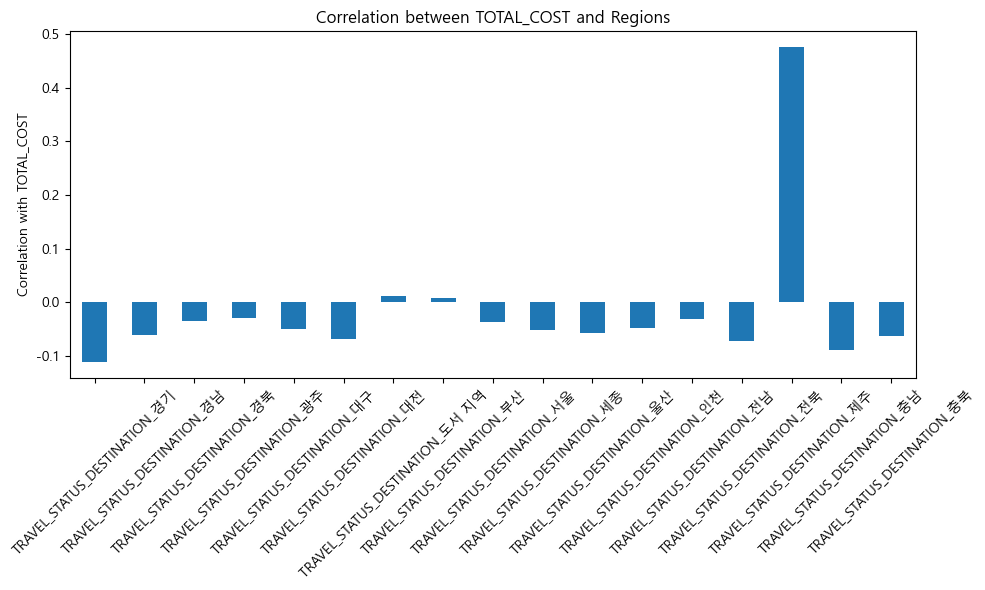

In [377]:

# Converting categorical variables to dummy variables
data_with_dummies = pd.get_dummies(data, drop_first=True)

# Calculating correlation matrix
correlation_matrix = data_with_dummies.corr()

# Filtering correlations related to TOTAL_COST and regions
total_cost_correlation = correlation_matrix['TOTAL_COST'].filter(like='TRAVEL_STATUS_DESTINATION')

# Plotting the correlation with TOTAL_COST for each region
plt.figure(figsize=(10, 6))
total_cost_correlation.plot(kind='bar', title='Correlation between TOTAL_COST and Regions', ylabel='Correlation with TOTAL_COST')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


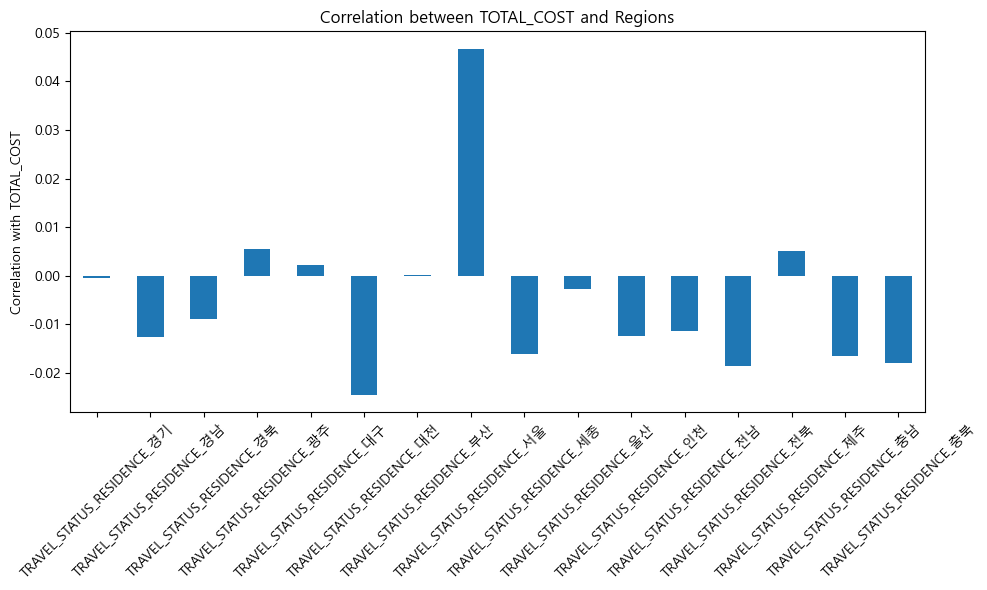

In [378]:

# Converting categorical variables to dummy variables
data_with_dummies = pd.get_dummies(data, drop_first=True)

# Calculating correlation matrix
correlation_matrix = data_with_dummies.corr()

# Filtering correlations related to TOTAL_COST and regions
total_cost_correlation = correlation_matrix['TOTAL_COST'].filter(like='TRAVEL_STATUS_RESIDENCE')

# Plotting the correlation with TOTAL_COST for each region
plt.figure(figsize=(10, 6))
total_cost_correlation.plot(kind='bar', title='Correlation between TOTAL_COST and Regions', ylabel='Correlation with TOTAL_COST')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [379]:
# 모든 열의 통계 요약 확인
data.describe()

,TOTAL_COST,TRAVEL_COMPANIONS_NUM,TRAVEL_DAY,TOTAL_AMT,TOTAL_LODGE,TOTAL_MVMN,lat_start,lon_start,lat_dest,lon_dest
count,6.146000e+03,6146.000000,6146.000000,6.146000e+03,6.146000e+03,6.146000e+03,6146.000000,6146.000000,6146.000000,6146.000000
mean,3.949761e+05,1.574415,3.148354,1.766168e+05,1.013185e+05,1.170407e+05,36.681448,127.413909,36.078266,127.344867
std,5.118737e+05,1.739395,1.172704,2.569094e+05,1.895853e+05,2.025363e+05,1.056134,0.798086,1.439280,0.873492
min,0.000000e+00,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,33.488918,126.462788,33.488918,126.462788
25%,1.053550e+05,0.521363,2.000000,5.300000e+04,0.000000e+00,2.190000e+04,35.871380,126.978652,35.179820,126.672776
50%,2.355035e+05,1.000000,3.000000,1.100000e+05,2.412283e+04,5.411045e+04,37.274977,127.008930,36.575996,127.008930
75%,4.755913e+05,2.000000,4.000000,2.188214e+05,1.320000e+05,1.131569e+05,37.566826,127.491457,37.274977,127.729829
max,1.091685e+07,20.000000,13.000000,8.735250e+06,2.800000e+06,2.752000e+06,37.885326,129.311603,37.885326,130.905700


* 위도 경도 추가

In [357]:
import requests
import pandas as pd
import time

# 카카오 API 키
API_KEY = "626898b3503d034bd3cb1e1771fb5719"

# 카카오 주소 검색 API를 사용해 위도와 경도를 얻는 함수
def get_coordinates_kakao(address):
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": f"KakaoAK {API_KEY}"}
    params = {"query": address}
    
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        if data['documents']:
            latitude = data['documents'][0]['y']
            longitude = data['documents'][0]['x']
            return float(latitude), float(longitude)
        else:
            return None, None
    else:
        print(f"Error {response.status_code}: {response.text}")
        return None, None

# 예제 데이터프레임 (지역 이름이 담긴 열이 있다고 가정)
# data = pd.DataFrame({'TRAVEL_STATUS_RESIDENCE': ['서울', '충북', '전남'], 'TRAVEL_STATUS_DESTINATION': ['제주', '부산', '서울']})

# 출발지와 도착지의 위도, 경도 추가
def add_coordinates(df, residence_col, destination_col):
    lat_start, lon_start, lat_dest, lon_dest = [], [], [], []

    for i, row in df.iterrows():
        # 출발 지역 좌표
        lat_s, lon_s = get_coordinates_kakao(row[residence_col])
        lat_start.append(lat_s)
        lon_start.append(lon_s)
        
        # 도착 지역 좌표
        lat_d, lon_d = get_coordinates_kakao(row[destination_col])
        lat_dest.append(lat_d)
        lon_dest.append(lon_d)
        
        # API 요청 제한을 피하기 위해 약간의 대기 시간 추가 (필요에 따라 조정)
        time.sleep(0.1)
    
    # 결과를 데이터프레임에 추가
    df['lat_start'] = lat_start
    df['lon_start'] = lon_start
    df['lat_dest'] = lat_dest
    df['lon_dest'] = lon_dest

# 예제 데이터프레임에 좌표 추가
add_coordinates(data, 'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION')
print(data)


     GENDER AGE_GRP INCOME TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION  \
0         남      20      1                      강원                        강원   
1         남      20      1                      강원                        경기   
2         남      20      1                      강원                        서울   
3         남      20      1                      강원                        서울   
4         남      20      1                      경기                        강원   
...     ...     ...    ...                     ...                       ...   
6141      여      60      8                      서울                        광주   
6142      여      60     10                      전북                        전남   
6143      여      60     12                      부산                        울산   
6144      여      60     12                      서울                        광주   
6145      여      60     12                      세종                        충남   

        MVMN WEEKEND_INCLUDED SEASON  T

- 파생변수 생성

In [380]:
## 여행 기간이 길고 동반자가 많을수록 여행 경비가 더 많이 들 가능성이 크다.
# 새로운 변수 추가 (TRAVEL_COMPANIONS_NUM * TRAVEL_DAY)
data['COMPANIONS_DAYS'] = data['TRAVEL_COMPANIONS_NUM'] * data['TRAVEL_DAY']

In [381]:
# 고비용/저비용 수준 변수 생성
data['COST_LEVEL'] = np.where(data['TOTAL_COST'] > data['TOTAL_COST'].median(), 'high', 'low')

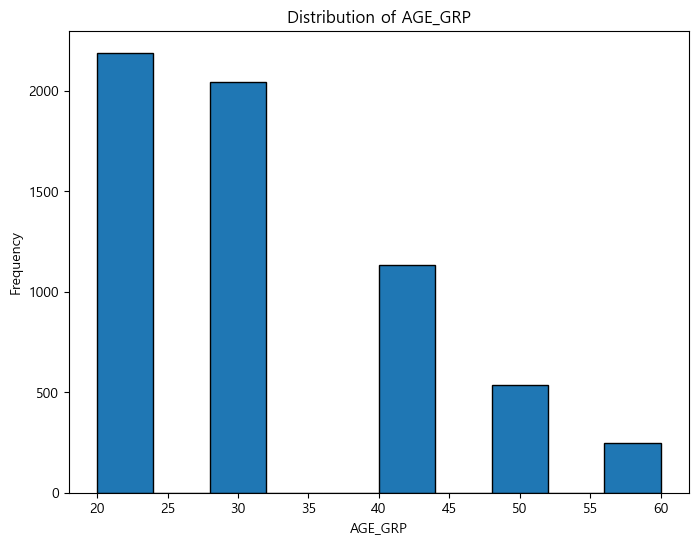

In [382]:
# AGE_GRP 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(data['AGE_GRP'], bins=10, edgecolor='black')
plt.title('Distribution of AGE_GRP')
plt.xlabel('AGE_GRP')
plt.ylabel('Frequency')
plt.show()

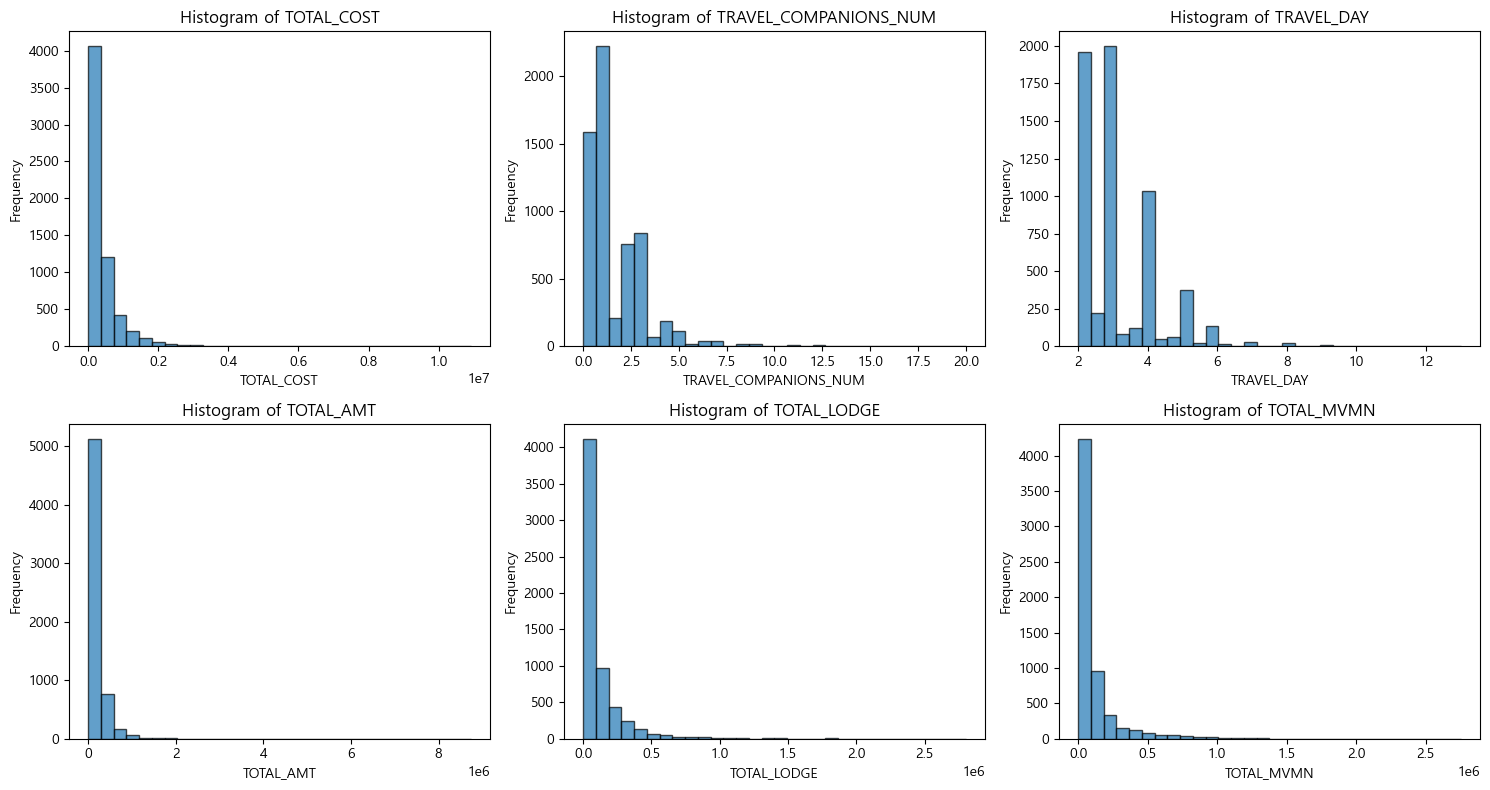

In [383]:
import matplotlib.pyplot as plt

# 수치형 변수 선택
numerical_cols = ['TOTAL_COST', 'TRAVEL_COMPANIONS_NUM', 'TRAVEL_DAY', 'TOTAL_AMT', 'TOTAL_LODGE', 'TOTAL_MVMN']

# 히스토그램을 위한 행렬 형태 설정 (2 x 3 그리드)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2행 3열 그리드
axes = axes.flatten()  # 2차원 배열을 1차원으로 평탄화

# 각 수치형 변수에 대해 히스토그램 그리기
for i, col in enumerate(numerical_cols):
    axes[i].hist(data[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [384]:
# 여행 기간이 2일 이하인 경우를 나타내는 변수 생성
data['TRAVEL_DAY_2_OR_LESS'] = (data['TRAVEL_DAY'] <= 2).astype(int)

In [385]:
# 여행 목적지가 제주도인 경우를 나타내는 변수 생성
data['DESTINATION_IS_JEJU'] = (data['TRAVEL_STATUS_DESTINATION'] == '제주').astype(int)

In [387]:
# 거주지가 제주도인 경우를 나타내는 변수 생성
data['RESIDENCE_IS_JEJU'] = (data['TRAVEL_STATUS_RESIDENCE'] == '제주').astype(int)

In [386]:
# 거주지가 서울인 경우를 나타내는 변수 생성
data['RESIDENCE_IS_SEOUL'] = (data['TRAVEL_STATUS_RESIDENCE'] == '서울').astype(int)

In [399]:
# 위도, 경도를 라디안으로 변환
data['lat_start_rad'] = np.radians(data['lat_start'])
data['lon_start_rad'] = np.radians(data['lon_start'])
data['lat_dest_rad'] = np.radians(data['lat_dest'])
data['lon_dest_rad'] = np.radians(data['lon_dest'])

# Haversine formula를 이용한 거리 계산 (단위: km)
earth_radius = 6371  # 지구 반지름 (km)
data['DISTANCE'] = 2 * earth_radius * np.arcsin(
    np.sqrt(
        np.sin((data['lat_dest_rad'] - data['lat_start_rad']) / 2) ** 2 +
        np.cos(data['lat_start_rad']) * np.cos(data['lat_dest_rad']) *
        np.sin((data['lon_dest_rad'] - data['lon_start_rad']) / 2) ** 2
    )
)


- 이상치 처리

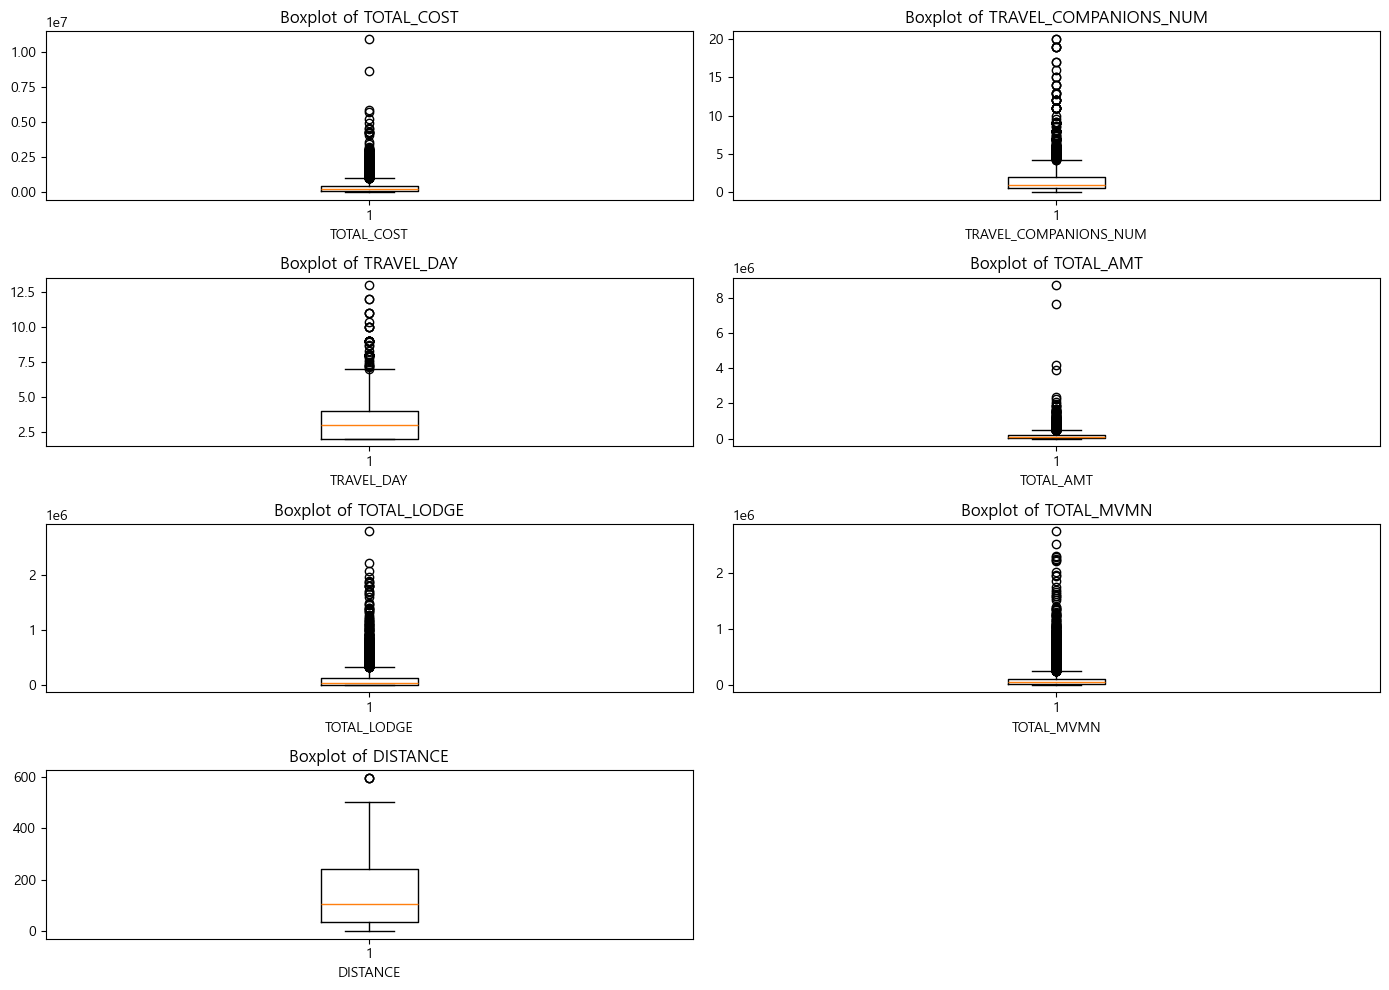

In [402]:
import matplotlib.pyplot as plt

# Set up the figure for box plots of the numerical variables
numerical_columns = ['TOTAL_COST', 'TRAVEL_COMPANIONS_NUM', 'TRAVEL_DAY', 'TOTAL_AMT', 'TOTAL_LODGE', 'TOTAL_MVMN', 'DISTANCE']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    plt.boxplot(data[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [403]:
# Step 2: Implement group separation based on a threshold (3번 방법)
# Here, I'll define a threshold (e.g., companions count > 5) to distinguish between group and individual travel
threshold = 5
data['TRAVEL_TYPE'] = data['TRAVEL_COMPANIONS_NUM'].apply(lambda x: 'Group' if x > threshold else 'Individual')


In [404]:
# Step 1: Calculate the IQR and define outliers for TRAVEL_COMPANIONS_NUM
q1 = data['TRAVEL_COMPANIONS_NUM'].quantile(0.25)
q3 = data['TRAVEL_COMPANIONS_NUM'].quantile(0.75)
iqr = q3 - q1

# Define the upper and lower bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Apply the outlier removal (1번 방법)
filtered_data_iqr = data[(data['TRAVEL_COMPANIONS_NUM'] >= lower_bound) & (data['TRAVEL_COMPANIONS_NUM'] <= upper_bound)]

# Display summary statistics
filtered_data_summary = filtered_data_iqr[['TRAVEL_COMPANIONS_NUM']].describe()
travel_type_counts = data['TRAVEL_TYPE'].value_counts()

print("Filtered Data (IQR Method) - TRAVEL_COMPANIONS_NUM Summary:")
print(filtered_data_summary)
print("\nTRAVEL_TYPE Counts:")
print(travel_type_counts)


Filtered Data (IQR Method) - TRAVEL_COMPANIONS_NUM Summary:
       TRAVEL_COMPANIONS_NUM
count            5843.000000
mean                1.302914
std                 1.109730
min                 0.000000
25%                 0.333333
50%                 1.000000
75%                 2.000000
max                 4.181818

TRAVEL_TYPE Counts:
TRAVEL_TYPE
Individual    5970
Group          176
Name: count, dtype: int64


In [405]:
# Define threshold for classifying as long or short trip (e.g., 5 days)
long_trip_threshold = 5
filtered_data_iqr['TRAVEL_TYPE'] =filtered_data_iqr['TRAVEL_DAY'].apply(lambda x: 'Long' if x >= long_trip_threshold else 'Short')

C:\Users\원동아\AppData\Local\Temp\ipykernel_18440\1759953334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_iqr['TRAVEL_TYPE'] =filtered_data_iqr['TRAVEL_DAY'].apply(lambda x: 'Long' if x >= long_trip_threshold else 'Short')


In [406]:
# Step 1: Calculate the IQR and define outliers for TRAVEL_DAY
q1_day = filtered_data_iqr['TRAVEL_DAY'].quantile(0.25)
q3_day = filtered_data_iqr['TRAVEL_DAY'].quantile(0.75)
iqr_day = q3_day - q1_day

# Define the upper and lower bounds for outliers for TRAVEL_DAY
lower_bound_day = q1_day - 1.5 * iqr_day
upper_bound_day = q3_day + 1.5 * iqr_day

# Apply the outlier removal for TRAVEL_DAY
filtered_data_iqr_day = filtered_data_iqr[(filtered_data_iqr['TRAVEL_DAY'] >= lower_bound_day) & (filtered_data_iqr['TRAVEL_DAY'] <= upper_bound_day)]

# Display summary statistics for TRAVEL_DAY after filtering
filtered_data_day_summary = filtered_data_iqr_day['TRAVEL_DAY'].describe()
print("Filtered Data (IQR Method) - TRAVEL_DAY Summary:")
print(filtered_data_day_summary)


Filtered Data (IQR Method) - TRAVEL_DAY Summary:
count    5792.000000
mean        3.080398
std         1.042237
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: TRAVEL_DAY, dtype: float64


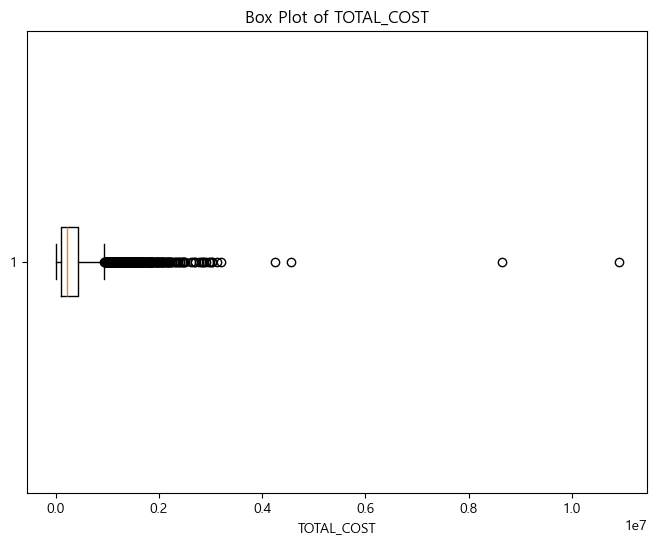

In [407]:
# Plotting a boxplot for 'TOTAL_COST' to check for outliers or extreme values
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data_iqr_day['TOTAL_COST'].dropna(), vert=False)
plt.title('Box Plot of TOTAL_COST')
plt.xlabel('TOTAL_COST')
plt.show()

In [408]:
# 1. Q1, Q3와 IQR 계산
Q1 = filtered_data_iqr_day['TOTAL_COST'].quantile(0.25)
Q3 = filtered_data_iqr_day['TOTAL_COST'].quantile(0.75)
IQR = Q3 - Q1

# 2. 상한 및 하한 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. 상한과 하한을 벗어나는 이상치 제거
data_filtered = filtered_data_iqr_day[(filtered_data_iqr_day['TOTAL_COST'] >= lower_bound) & (filtered_data_iqr_day['TOTAL_COST'] <= upper_bound)]

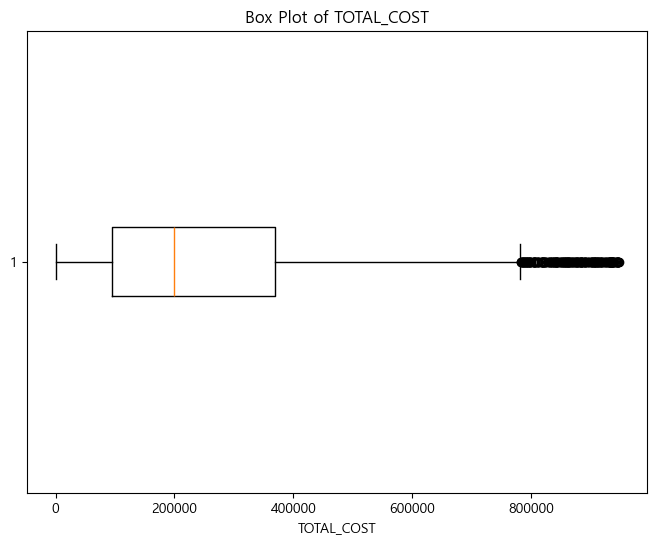

In [409]:
# Plotting a boxplot for 'TOTAL_COST' to check for outliers or extreme values
plt.figure(figsize=(8, 6))
plt.boxplot(data_filtered['TOTAL_COST'].dropna(), vert=False)
plt.title('Box Plot of TOTAL_COST')
plt.xlabel('TOTAL_COST')
plt.show()

In [410]:
# 로그 변환을 목표 변수에 적용
data_filtered['LOG_TOTAL_COST'] = np.log1p(data_filtered['TOTAL_COST'])

C:\Users\원동아\AppData\Local\Temp\ipykernel_18440\2193232880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['LOG_TOTAL_COST'] = np.log1p(data_filtered['TOTAL_COST'])


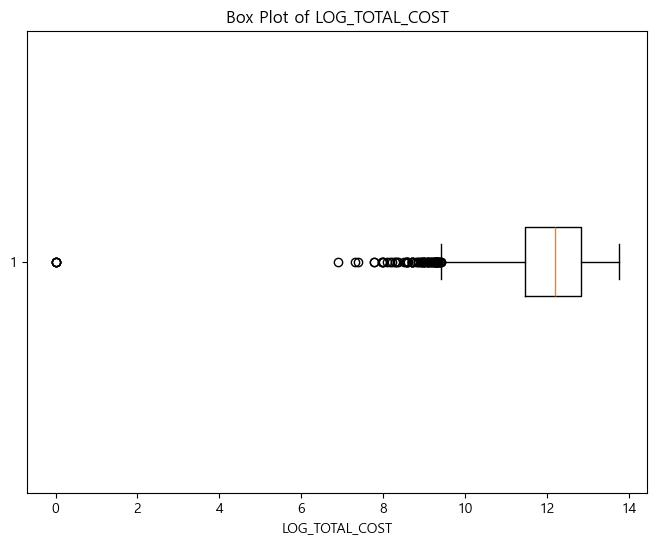

In [411]:
# Plotting a boxplot for 'LOG_TOTAL_COST' to check for outliers or extreme values
plt.figure(figsize=(8, 6))
plt.boxplot(data_filtered['LOG_TOTAL_COST'].dropna(), vert=False)
plt.title('Box Plot of LOG_TOTAL_COST')
plt.xlabel('LOG_TOTAL_COST')
plt.show()

In [436]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder

# 범주형 변수를 원-핫 인코딩
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# 상호 정보량 계산
mutual_info = mutual_info_regression(X_encoded, y)
important_features = pd.Series(mutual_info, index=X_encoded.columns).sort_values(ascending=False)
print(important_features.head(10))

COST_LEVEL_low           0.683864
COST_LEVEL_high          0.683855
TRAVEL_DAY               0.354941
TRAVEL_DAY_2_OR_LESS     0.263227
COMPANIONS_DAYS          0.211687
DISTANCE                 0.122831
lat_dest_rad             0.074853
lon_dest_rad             0.073267
TRAVEL_COMPANIONS_NUM    0.057949
TRAVEL_TYPE_Short        0.049271
dtype: float64


1. 랜덤 포레스트

In [437]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 특성과 타겟 변수 정의
X = data_filtered.drop(['TOTAL_COST', 'LOG_TOTAL_COST', 'TOTAL_AMT', 'TOTAL_LODGE', 'TOTAL_MVMN', 'lat_start', 'lon_start', 'lat_dest', 'lon_dest','lat_start_rad', 'lon_start_rad', 'lat_dest_rad', 'lon_dest_rad'], axis=1)
y = data_filtered['LOG_TOTAL_COST']

# 범주형 변수를 'category' 타입으로 변경하여 오류 예방
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
for col in categorical_cols:
    X[col] = X[col].astype('category')

# 범주형 변수 선택
categorical_cols = [col for col in X.columns if X[col].dtype == 'category']

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Random Forest 모델 파이프라인 설정 (최적 하이퍼파라미터 사용)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        max_depth=10, 
        min_samples_leaf=7, 
        min_samples_split=9, 
        n_estimators=137, 
        random_state=0
    ))
])


# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 학습
rf_pipeline.fit(X_train, y_train)

# 검증 데이터 예측
preds_log_scaled = rf_pipeline.predict(X_valid)

# 예측 결과를 원래 스케일로 변환
preds_original_scale = np.expm1(preds_log_scaled)
y_valid_original_scale = np.expm1(y_valid)

# 모델 성능 평가
mae = mean_absolute_error(y_valid_original_scale, preds_original_scale)
r2 = r2_score(y_valid_original_scale, preds_original_scale)
rmse = np.sqrt(mean_squared_error(y_valid_original_scale, preds_original_scale))

# Adjusted R² 계산
n = X_valid.shape[0]  # 데이터 포인트 수
p = X_valid.shape[1]  # 설명 변수 수
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# 결과 출력
print(f"Tuned Random Forest MAE: {mae}")
print(f"Tuned Random Forest R^2: {r2}")
print(f"Tuned Random Forest Adjusted R^2: {adjusted_r2}")
print(f"RMSE (Original Scale): {rmse}")


Tuned Random Forest MAE: 71419.41766822353
Tuned Random Forest R^2: 0.7312661186603981
Tuned Random Forest Adjusted R^2: 0.7266636354405
RMSE (Original Scale): 104143.29385835097


- 하이퍼파라미터 튜닝

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform

# 특성과 타겟 변수 정의
X = data_filtered.drop(['TOTAL_COST', 'LOG_TOTAL_COST', 'TOTAL_AMT', 'TOTAL_LODGE', 'TOTAL_MVMN', 'lat_start', 'lon_start', 'lat_dest', 'lon_dest','lat_start_rad', 'lon_start_rad', 'lat_dest_rad', 'lon_dest_rad'], axis=1)
y = data_filtered['LOG_TOTAL_COST']

# 범주형 변수를 'category' 타입으로 변경하여 오류 예방
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
for col in categorical_cols:
    X[col] = X[col].astype('category')

# 범주형 변수 선택
categorical_cols = [col for col in X.columns if X[col].dtype == 'category']

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Random Forest 모델 파이프라인 설정
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=0))
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,  # 교차 검증 폴드 수
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)


# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# 최적의 하이퍼파라미터 찾기
random_search.fit(X_train, y_train)

# 최적의 파라미터로 모델 학습
best_pipeline = random_search.best_estimator_
best_pipeline.fit(X_train, y_train)

# 검증 데이터 예측 (로그 스케일)
preds_log_scaled = best_pipeline.predict(X_valid)

# 예측 결과를 원래 스케일로 변환
preds_original_scale = np.expm1(preds_log_scaled)
y_valid_original_scale = np.expm1(y_valid)

# 모델 성능 평가
mae = mean_absolute_error(y_valid_original_scale, preds_original_scale)
r2 = r2_score(y_valid_original_scale, preds_original_scale)
rmse = np.sqrt(mean_squared_error(y_valid_original_scale, preds_original_scale))

print("Best Parameters:", random_search.best_params_)
print(f"Tuned Random Forest MAE: {mae}")
print(f"Tuned Random Forest R^2: {r2}")
print(f"RMSE (Original Scale): {rmse}")


2. LightGBM

In [438]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 특성과 타겟 변수 정의
X = data_filtered.drop(['TOTAL_COST', 'LOG_TOTAL_COST','TOTAL_AMT',	'TOTAL_LODGE',	'TOTAL_MVMN', 'lat_start', 'lon_start', 'lat_dest', 'lon_dest','lat_start_rad', 'lon_start_rad', 'lat_dest_rad', 'lon_dest_rad'], axis=1)
y = data_filtered['LOG_TOTAL_COST']

# 범주형 변수를 'category' 타입으로 변경하여 오류 예방
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
for col in categorical_cols:
    X[col] = X[col].astype('category')

# 범주형 변수 선택
categorical_cols = [col for col in X.columns if X[col].dtype == 'category']

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# LightGBM 모델 파이프라인 설정 (과적합 방지용 파라미터 조정)
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=0, 
                            min_data_in_leaf=15, num_leaves=50, max_depth=7, min_child_samples=20))
])

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 학습
lgbm_pipeline.fit(X_train, y_train)

# 검증 데이터 예측
preds_log_scaled = lgbm_pipeline.predict(X_valid)

# 예측 결과를 원래 스케일로 변환
preds_original_scale = np.expm1(preds_log_scaled)
y_valid_original_scale = np.expm1(y_valid)

# 모델 성능 평가
mae = mean_absolute_error(y_valid_original_scale, preds_original_scale)
r2 = r2_score(y_valid_original_scale, preds_original_scale)
rmse = np.sqrt(mean_squared_error(y_valid_original_scale, preds_original_scale))

# Adjusted R² 계산
n = X_valid.shape[0]  # 데이터 포인트 수
p = X_valid.shape[1]  # 설명 변수 수
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# 결과 출력
print(f"LightGBM MAE: {mae}")
print(f"LightGBM R^2: {r2}")
print(f"LightGBM Adjusted R^2: {adjusted_r2}")
print(f"RMSE (Original Scale): {rmse}")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 4279, number of used features: 73
[LightGBM] [Info] Start training from score 12.082532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

3. XGBoost

In [442]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 특성과 타겟 변수 정의 (로그 변환 변수 제거)
X = data_filtered.drop(['TOTAL_COST', 'LOG_TOTAL_COST','TOTAL_AMT',	'TOTAL_LODGE',	'TOTAL_MVMN', 'lat_start', 'lon_start', 'lat_dest', 'lon_dest','lat_start_rad', 'lon_start_rad', 'lat_dest_rad', 'lon_dest_rad'], axis=1)
y = data_filtered['TOTAL_COST']  # 원래 스케일의 TARGET 사용

# 범주형 변수를 'category' 타입으로 변경하여 오류 예방
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
for col in categorical_cols:
    X[col] = X[col].astype('category')

# 범주형 변수 선택
categorical_cols = [col for col in X.columns if X[col].dtype == 'category']

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# XGBoost 모델 파이프라인 설정
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=7, 
                           subsample=0.8, colsample_bytree=0.8, random_state=0))
])

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 학습
xgb_pipeline.fit(X_train, y_train)

# 검증 데이터 예측
preds = xgb_pipeline.predict(X_valid)

# 모델 성능 평가
mae = mean_absolute_error(y_valid, preds)
r2 = r2_score(y_valid, preds)
rmse = np.sqrt(mean_squared_error(y_valid, preds))

# Adjusted R² 계산
n = X_valid.shape[0]  # 데이터 포인트 수
p = X_valid.shape[1]  # 설명 변수 수
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# 결과 출력
print(f"XGBoost MAE without Log Transformation: {mae}")
print(f"XGBoost R^2 without Log Transformation: {r2}")
print(f"XGBoost Adjusted R^2 without Log Transformation: {adjusted_r2}")
print(f"RMSE without Log Transformation: {rmse}")


XGBoost MAE without Log Transformation: 72805.11136520073
XGBoost R^2 without Log Transformation: 0.7226108477127935
XGBoost Adjusted R^2 without Log Transformation: 0.7178601295956006
RMSE without Log Transformation: 105807.10549310171


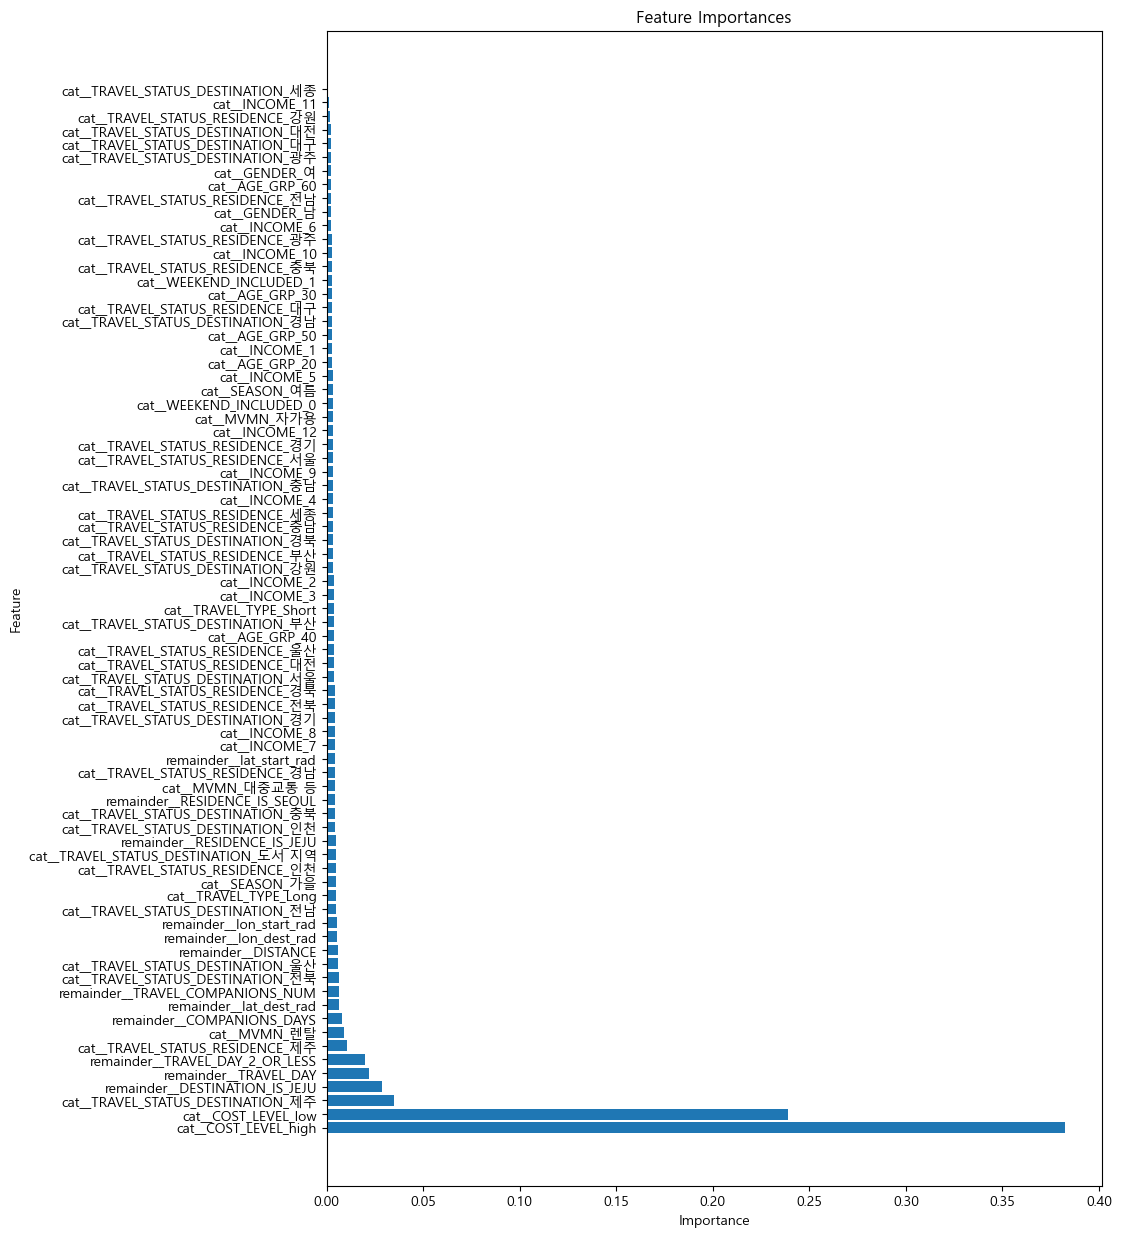

In [415]:
import matplotlib.pyplot as plt

# 모델 학습 이후 특성 중요도 추출
feature_importances = xgb_pipeline.named_steps['model'].feature_importances_
feature_names = xgb_pipeline.named_steps['preprocessor'].get_feature_names_out()

# 중요도와 이름을 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 15))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

4. CatBoost

In [443]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 특성과 타겟 변수 정의
X = data_filtered.drop(['TOTAL_COST', 'LOG_TOTAL_COST','TOTAL_AMT',	'TOTAL_LODGE',	'TOTAL_MVMN', 'lat_start', 'lon_start', 'lat_dest', 'lon_dest','lat_start_rad', 'lon_start_rad', 'lat_dest_rad', 'lon_dest_rad'], axis=1)
y = data_filtered['LOG_TOTAL_COST']

# 범주형 변수를 'category' 타입으로 변경하여 오류 예방
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
for col in categorical_cols:
    X[col] = X[col].astype('category')

# 범주형 변수 선택
categorical_cols = [col for col in X.columns if X[col].dtype == 'category']

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# CatBoost 모델 설정
catboost_model = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=7, 
                                   cat_features=categorical_cols, random_seed=0, verbose=0)

# 모델 학습
catboost_model.fit(X_train, y_train)

# 검증 데이터 예측
preds_log_scaled = catboost_model.predict(X_valid)

# 예측 결과를 원래 스케일로 변환
preds_original_scale = np.expm1(preds_log_scaled)
y_valid_original_scale = np.expm1(y_valid)

# 모델 성능 평가
mae = mean_absolute_error(y_valid_original_scale, preds_original_scale)
r2 = r2_score(y_valid_original_scale, preds_original_scale)
rmse = np.sqrt(mean_squared_error(y_valid_original_scale, preds_original_scale))

# Adjusted R² 계산
n = X_valid.shape[0]  # 데이터 포인트 수
p = X_valid.shape[1]  # 설명 변수 수
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# 결과 출력
print(f"CatBoost MAE with Log Transformation: {mae}")
print(f"CatBoost R^2 with Log Transformation: {r2}")
print(f"CatBoost Adjusted R^2 with Log Transformation: {adjusted_r2}")
print(f"RMSE (Original Scale) with Log Transformation: {rmse}")



CatBoost MAE with Log Transformation: 71747.82207170915
CatBoost R^2 with Log Transformation: 0.7293413257427594
CatBoost Adjusted R^2 with Log Transformation: 0.724705877468135
RMSE (Original Scale) with Log Transformation: 104515.58896537103


5. SVM

In [444]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 특성과 타겟 변수 정의
X = data_filtered.drop(['TOTAL_COST', 'LOG_TOTAL_COST', 'TOTAL_AMT', 'TOTAL_LODGE', 'TOTAL_MVMN', 'lat_start', 'lon_start', 'lat_dest', 'lon_dest','lat_start_rad', 'lon_start_rad', 'lat_dest_rad', 'lon_dest_rad'], axis=1)
y = data_filtered['LOG_TOTAL_COST']

# 범주형 변수와 수치형 변수 분리
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# SVM 모델 파이프라인 설정
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 학습
svm_pipeline.fit(X_train, y_train)

# 검증 데이터 예측
preds_log_scaled = svm_pipeline.predict(X_valid)

# 예측 결과를 원래 스케일로 변환
preds_original_scale = np.expm1(preds_log_scaled)
y_valid_original_scale = np.expm1(y_valid)

# 모델 성능 평가
mae = mean_absolute_error(y_valid_original_scale, preds_original_scale)
r2 = r2_score(y_valid_original_scale, preds_original_scale)
rmse = np.sqrt(mean_squared_error(y_valid_original_scale, preds_original_scale))

# Adjusted R² 계산
n = X_valid.shape[0]  # 데이터 포인트 수
p = X_valid.shape[1]  # 설명 변수 수
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# 결과 출력
print(f"SVM MAE: {mae}")
print(f"SVM R^2: {r2}")
print(f"SVM Adjusted R^2: {adjusted_r2}")
print(f"RMSE (Original Scale): {rmse}")


SVM MAE: 72304.75718797787
SVM R^2: 0.7022988136679815
SVM Adjusted R^2: 0.6972002205623904
RMSE (Original Scale): 109612.57488211498


6. KNN

In [445]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 특성과 타겟 변수 정의
X = data_filtered.drop(['TOTAL_COST', 'LOG_TOTAL_COST', 'TOTAL_AMT', 'TOTAL_LODGE', 'TOTAL_MVMN', 'lat_start', 'lon_start', 'lat_dest', 'lon_dest','lat_start_rad', 'lon_start_rad', 'lat_dest_rad', 'lon_dest_rad'], axis=1)
y = data_filtered['LOG_TOTAL_COST']

# 범주형 변수와 수치형 변수 분리
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# k-NN 모델 파이프라인 설정
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor(n_neighbors=5))  # 기본적으로 k=5를 사용
])

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 학습
knn_pipeline.fit(X_train, y_train)

# 검증 데이터 예측
preds_log_scaled = knn_pipeline.predict(X_valid)

# 예측 결과를 원래 스케일로 변환
preds_original_scale = np.expm1(preds_log_scaled)
y_valid_original_scale = np.expm1(y_valid)

# 모델 성능 평가
mae = mean_absolute_error(y_valid_original_scale, preds_original_scale)
r2 = r2_score(y_valid_original_scale, preds_original_scale)
rmse = np.sqrt(mean_squared_error(y_valid_original_scale, preds_original_scale))

print(f"k-NN MAE: {mae}")
print(f"k-NN R^2: {r2}")
print(f"RMSE (Original Scale): {rmse}")

k-NN MAE: 84762.06504119796
k-NN R^2: 0.6220045457734071
RMSE (Original Scale): 123513.20341561407


7. 스태킹

In [446]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 특성과 타겟 변수 정의
X = data_filtered.drop(['TOTAL_COST', 'LOG_TOTAL_COST', 'TOTAL_AMT', 'TOTAL_LODGE', 'TOTAL_MVMN', 'lat_start', 'lon_start', 'lat_dest', 'lon_dest','lat_start_rad', 'lon_start_rad', 'lat_dest_rad', 'lon_dest_rad'], axis=1)
y = data_filtered['LOG_TOTAL_COST']

# 범주형 변수와 수치형 변수 분리
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# 개별 모델 정의 (RandomForest, CatBoost)
base_estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=0)),
    ('cat', CatBoostRegressor(n_estimators=100, random_state=0, verbose=0))
]

# 스태킹 모델 설정 (Ridge를 메타 모델로 사용)
stacking_model = StackingRegressor(
    estimators=base_estimators,
    final_estimator=Ridge(),  # 최종 예측을 수행할 메타 모델
    passthrough=True          # 원래 특성과 개별 모델 예측 값을 모두 사용
)

# 전체 파이프라인 설정
stacking_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', stacking_model)
])

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 학습
stacking_pipeline.fit(X_train, y_train)

# 검증 데이터 예측
preds_log_scaled = stacking_pipeline.predict(X_valid)

# 예측 결과를 원래 스케일로 변환
preds_original_scale = np.expm1(preds_log_scaled)
y_valid_original_scale = np.expm1(y_valid)

# 모델 성능 평가
mae = mean_absolute_error(y_valid_original_scale, preds_original_scale)
r2 = r2_score(y_valid_original_scale, preds_original_scale)
rmse = np.sqrt(mean_squared_error(y_valid_original_scale, preds_original_scale))

print(f"Stacking Regressor (RandomForest + CatBoost) MAE: {mae}")
print(f"Stacking Regressor (RandomForest + CatBoost) R^2: {r2}")
print(f"RMSE (Original Scale): {rmse}")


Stacking Regressor (RandomForest + CatBoost) MAE: 73492.78216016685
Stacking Regressor (RandomForest + CatBoost) R^2: 0.7137400435746883
RMSE (Original Scale): 107485.6278297984


- 하이퍼파라미터 튜닝

In [425]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# 개별 모델 및 메타 모델 설정
random_forest = RandomForestRegressor(random_state=0)
catboost = CatBoostRegressor(random_state=0, verbose=0)
ridge = Ridge()

# 스태킹 모델 설정
stacking_model = StackingRegressor(
    estimators=[
        ('rf', random_forest),
        ('cat', catboost)
    ],
    final_estimator=ridge,
    passthrough=True
)

# 전처리 및 스태킹 모델 파이프라인 설정
stacking_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # 전처리 단계는 위의 preprocessor 재사용
    ('model', stacking_model)
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    # RandomForestRegressor 하이퍼파라미터
    'model__rf__n_estimators': [50, 100, 200],
    'model__rf__max_depth': [None, 10, 20],
    'model__rf__min_samples_split': [2, 5, 10],

    # CatBoostRegressor 하이퍼파라미터
    'model__cat__iterations': [100, 200],
    'model__cat__depth': [6, 8, 10],
    'model__cat__learning_rate': [0.01, 0.1, 0.2],

    # Ridge (메타 모델) 하이퍼파라미터
    'model__final_estimator__alpha': [0.1, 1.0, 10.0]
}

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=stacking_pipeline,
    param_grid=param_grid,
    cv=3,  # 3-fold 교차검증
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=1
)

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# 최적의 하이퍼파라미터 탐색
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 및 성능 확인
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# 최적의 모델로 예측 수행 및 평가
best_model = grid_search.best_estimator_
preds_log_scaled = best_model.predict(X_valid)

# 예측 결과를 원래 스케일로 변환
preds_original_scale = np.expm1(preds_log_scaled)
y_valid_original_scale = np.expm1(y_valid)

mae = mean_absolute_error(y_valid_original_scale, preds_original_scale)
r2 = r2_score(y_valid_original_scale, preds_original_scale)
rmse = np.sqrt(mean_squared_error(y_valid_original_scale, preds_original_scale))

print(f"Best Stacking Regressor MAE: {mae}")
print(f"Best Stacking Regressor R^2: {r2}")
print(f"RMSE (Original Scale): {rmse}")


Fitting 3 folds for each of 1458 candidates, totalling 4374 fits


KeyboardInterrupt: 

선형 회귀

In [434]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Preparing the dataset for linear regression
# Dropping categorical variables for simplicity in linear regression
# Later on, we could apply encoding if necessary
numeric_data = data_filtered.select_dtypes(include=[np.number])
X = numeric_data.drop(columns=['TOTAL_COST', 'TOTAL_AMT', 'TOTAL_MVMN', 'TOTAL_LODGE', 'lat_start', 'lon_start', 'lat_dest', 'lon_dest'])
y = numeric_data['TOTAL_COST']

# Splitting the data_filtered into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Making predictions
y_pred = linear_model.predict(X_test)

# Calculating MAE, RMSE, and R^2
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(72052.16485855207, 116540.87654932516, 0.718941050363845)